# This dataset provides a huge amount of information on crop production in India ranging from several years.
Based on the Information the ultimate goal would be to predict crop production using powerful machine learning techniques.

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings("ignore")

C:\Users\Admin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# EXPLORATORY DATA ANALYSIS

In [2]:
#Loading Dataset
df=pd.read_csv("Crop_Production_Data (1).csv")

In [3]:
#Reading top five rows of dataset
df.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000.0,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000.0,Whole Year,Cashewnut,720.0,165.0


In [4]:
#information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246053 non-null  object 
 1   District_Name  245871 non-null  object 
 2   Crop_Year      245992 non-null  float64
 3   Season         245999 non-null  object 
 4   Crop           246006 non-null  object 
 5   Area           245580 non-null  float64
 6   Production     242340 non-null  float64
dtypes: float64(3), object(4)
memory usage: 13.1+ MB


In [5]:
#Checking the unique values in each column
cols = df.columns
for i in cols:
    print(i, df[i].unique(), '\n')

State_Name ['Andaman and Nicobar Islands' 'Andhra Pradesh' nan 'Arunachal Pradesh'
 'Assam' 'Bihar' 'Chandigarh' 'Chhattisgarh' 'Dadra and Nagar Haveli'
 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh' 'Jammu and Kashmir '
 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha' 'Puducherry' 'Punjab'
 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana ' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal'] 

District_Name ['NICOBARS' 'NORTH AND MIDDLE ANDAMAN' 'SOUTH ANDAMANS' 'ANANTAPUR'
 'CHITTOOR' 'EAST GODAVARI' 'GUNTUR' 'KADAPA' 'KRISHNA' 'KURNOOL' nan
 'PRAKASAM' 'SPSR NELLORE' 'SRIKAKULAM' 'VISAKHAPATANAM' 'VIZIANAGARAM'
 'WEST GODAVARI' 'ANJAW' 'CHANGLANG' 'DIBANG VALLEY' 'EAST KAMENG'
 'EAST SIANG' 'KURUNG KUMEY' 'LOHIT' 'LONGDING' 'LOWER DIBANG VALLEY'
 'LOWER SUBANSIRI' 'NAMSAI' 'PAPUM PARE' 'TAWANG' 'TIRAP' 'UPPER SIANG'
 'UPPER SUBANSIRI' 'WEST KAMENG' 'WEST SIANG' 'BAKSA' 'BARPETA'
 'BONGAIGAON' 'CACHAR' 'CHIRANG' 'DAR

In [6]:
#finding null values
df.isnull().sum()

State_Name         38
District_Name     220
Crop_Year          99
Season             92
Crop               85
Area              511
Production       3751
dtype: int64

In [7]:
#checking dimension of the dataset
df.shape

(246091, 7)

In [8]:
#checking different columns of the dataset
df.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [9]:
#checking descriptive data
df.describe()

,Crop_Year,Area,Production
count,245992.000000,2.455800e+05,2.423400e+05
mean,2005.643029,1.201657e+04,5.825539e+05
std,4.952342,5.057104e+04,1.706655e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.830000e+02,7.290000e+02
75%,2010.000000,4.400000e+03,7.025000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [10]:
#Dropping null values for handling null values
df=df.dropna()

In [11]:
df.isnull().sum()

State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64

In [12]:
#checking datatypes of columns
df.dtypes

State_Name        object
District_Name     object
Crop_Year        float64
Season            object
Crop              object
Area             float64
Production       float64
dtype: object

# Detecting and handling the outlier

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,241786.0,2005.624722,4.957933e+00,1997.0,2002.0,2006.0,2010.0,2.015000e+03
Area,241786.0,12183.172641,5.091222e+04,0.1,87.0,604.0,4552.0,8.580100e+06
Production,241786.0,583882.286648,1.708607e+07,0.0,88.0,732.0,7056.0,1.250800e+09


From data it can be observed that Area and Production has outlier will check differently for both columns

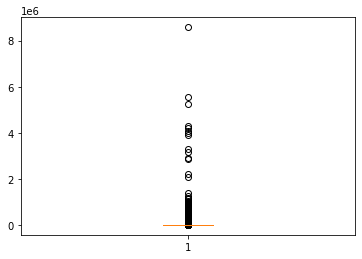

In [14]:
#Area
p=plt.boxplot(df['Area'])
#w=[i.get_ydata() for i in p['caps']]

In [15]:
w=[i.get_ydata() for i in p['caps']]
w

[array([0.1, 0.1]), array([11249., 11249.])]

The data gives idea that In Autumn season maximum production was occured

In [16]:
df.groupby("Season",axis=0).agg({"Production":np.sum})


,Production
Season,
Autumn,6.441377e+07
Kharif,4.028441e+09
Rabi,2.051663e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


This data gives overview that maximum production was of Coconut crop

In [17]:
top_crop= df.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


# DATA VISUALISATION

A Bar Plot used here is used to give visualisation of crop production across states of india
Kerala has the highest crop production across country

<AxesSubplot:xlabel='Production', ylabel='State_Name'>

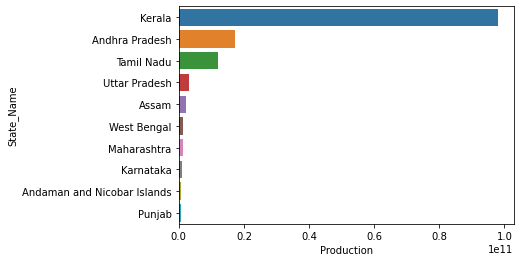

In [18]:
state_budget=df.groupby('State_Name')['Production'].sum()
state_budget=state_budget.sort_values(ascending=False).head(10)
plt.xlabel('Production')
sns.barplot(x=state_budget.values,y=state_budget.index)

A pie chart gives the details of top 5 crops in India Coconut is highest among the country with 95%

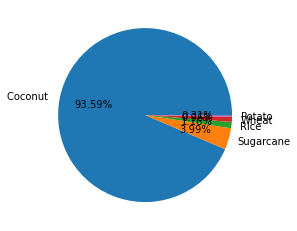

In [19]:
crops_budget = df.groupby('Crop')['Production'].sum().sort_values(ascending=False)
plt.pie(crops_budget.head(5), labels=crops_budget.head(5).index, autopct='%.2f%%')
plt.show()

Lineplot gives trend of production of crops yearly 2011 was year where agriculture was at peak

<AxesSubplot:xlabel='Crop_Year', ylabel='Production'>

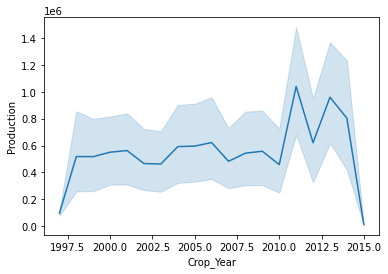

In [20]:
sns.lineplot(x=df['Crop_Year'],y=df['Production'])

Bar chart effectively visualizes crop production across different seasons, offering insights into crucial seasonal patterns 
that significantly influence crop yields.



<AxesSubplot:xlabel='Season'>

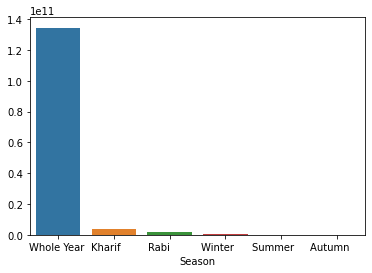

In [21]:
season_budget=df.groupby('Season')['Production'].sum()
season_budget=season_budget.sort_values(ascending=False)
sns.barplot(y=season_budget.values,x=season_budget.index)

In [22]:
top10_crop=df.Crop.value_counts()[:11]

In [23]:
top10_crop

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Groundnut             8770
Wheat                 7878
Sugarcane             7827
Rapeseed &Mustard     7533
Gram                  7227
Jowar                 6990
Name: Crop, dtype: int64

Barplot is used to show the count of top 10 maximum crop which are produced which is Rice

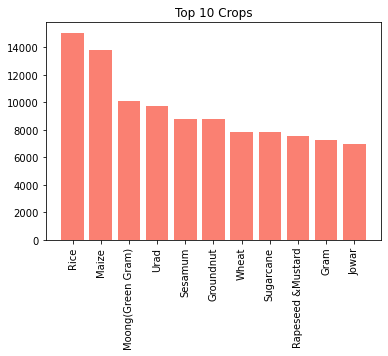

In [24]:
plt.bar(top10_crop.keys(),top10_crop.values,color="salmon")
plt.title("Top 10 Crops",fontdict={'size':12})
plt.xticks(rotation=90)
plt.show()

The Below Bar plot gives distribution of Area across different States
Punjab has highest Area for agriculture while Chandigarh has less area 

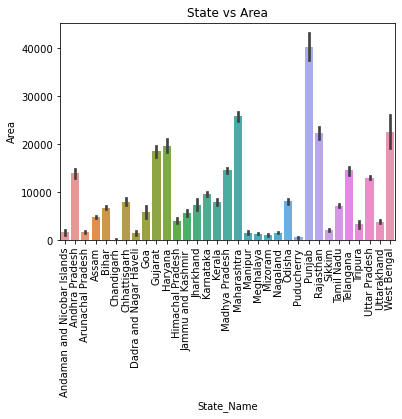

In [25]:
sns.barplot(data=df,x='State_Name',y='Area')
plt.title("State vs Area")
plt.xticks(rotation=90)
plt.show()

The below Barplot gives distribution for production of crops across different year .
In 2015 the production dipped drasctically

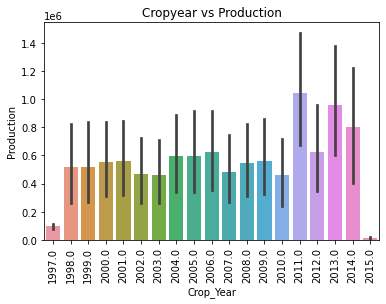

In [26]:
sns.barplot(data=df,x='Crop_Year',y='Production')
plt.title("Cropyear vs Production")
plt.xticks(rotation=90)
plt.show()

This below Barplot gives idea about season in which there is maximum area for production which is in Winter

Text(0.5, 1.0, 'Season vs Area')

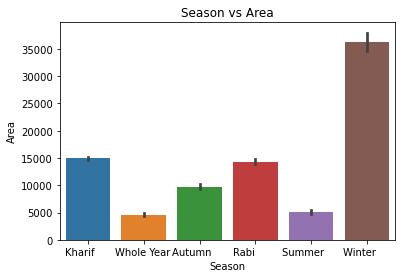

In [27]:
sns.barplot(data=df,x='Season',y='Area')
plt.title("Season vs Area")

# MACHINE LEARNING MODEL

First we have to label encode the object datatype column

In [28]:
#Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [29]:
#Transforming object datatype column into numeric datatype
df['State_Name']= le.fit_transform(df['State_Name'])
df['District_Name']= le.fit_transform(df['District_Name'])
df['Season']= le.fit_transform(df['Season'])
df['Crop']= le.fit_transform(df['Crop'])

In [30]:
#Checking datatypes of column after labelencoding
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241786 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     241786 non-null  int32  
 1   District_Name  241786 non-null  int32  
 2   Crop_Year      241786 non-null  float64
 3   Season         241786 non-null  int32  
 4   Crop           241786 non-null  int32  
 5   Area           241786 non-null  float64
 6   Production     241786 non-null  float64
dtypes: float64(3), int32(4)
memory usage: 11.1 MB


In [31]:
#train-test split -model
from sklearn.model_selection import train_test_split

In [32]:
#classifiying model into Xtrain and Ytrain 
x = df.drop("Production",axis=1)
y = df["Production"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.33, random_state=42)
print("xtrain :",xtrain.shape)
print("xtest :",xtest.shape)
print("ytrain :",ytrain.shape)
print("ytest :",ytest.shape)

xtrain : (161996, 6)
xtest : (79790, 6)
ytrain : (161996,)
ytest : (79790,)


In [33]:
xtrain[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area
112270,16,262,2003.0,4,67,280.0
89564,14,228,2011.0,2,67,7.0
229172,30,549,2000.0,1,59,17119.0
182711,27,407,2008.0,1,95,170840.0
193244,28,366,2002.0,1,102,883.0


# MODEL 1:LINEAR REGRESSION

Since the values of Production are continuous we will use Regression Algorithms

In [34]:
#Importing LinearRegression library
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
#Used to fit training data
lr.fit(xtrain,ytrain)

LinearRegression()

In [36]:
ypred=lr.predict(xtest)

In [37]:
#Used to check accuracy
from sklearn.metrics import mean_squared_error, r2_score
mean_squared_error(ytest,ypred)
r2_score(ytest,ypred)

0.005800084798941563

Since accuracy is very low df.corr() helps to find that there is non linear relationships between different columns of data

In [38]:
df.corr()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
State_Name,1.000000,-0.045461,-0.025836,-0.031190,0.007218,0.038788,-0.009646
District_Name,-0.045461,1.000000,-0.005550,0.016597,-0.006189,-0.019500,0.010130
Crop_Year,-0.025836,-0.005550,1.000000,-0.034233,0.003221,-0.025318,0.007005
Season,-0.031190,0.016597,-0.034233,1.000000,0.033877,-0.047916,0.045518
Crop,0.007218,-0.006189,0.003221,0.033877,1.000000,0.064797,-0.035592
Area,0.038788,-0.019500,-0.025318,-0.047916,0.064797,1.000000,0.040581
Production,-0.009646,0.010130,0.007005,0.045518,-0.035592,0.040581,1.000000


# MODEL 2:RANDOM FOREST REGRESSOR

In [39]:
#Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

In [40]:
model.fit(xtrain,ytrain)
preds = model.predict(xtest)


In [41]:
#Checking accuracy 
from sklearn.metrics import r2_score
r = r2_score(ytest,preds)
print("R2score when we predict using Randomn forest is ",r)

R2score when we predict using Randomn forest is  0.8955427546590224


RandomForest gives good accuracy of around 90%

In [42]:

# Compare predicted values with actual values
comparison_df = pd.DataFrame({'Actual': ytest, 'Predicted': preds})
print(comparison_df.head(10))  # Display the first 10 rows for comparison

# Evaluate model performance using metrics like Mean Squared Error (MSE) or R-squared
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(ytest, preds)
r2 = r2_score(ytest, preds)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


         Actual   Predicted
91152     649.0    451.5912
49561       1.0      1.2970
50596     124.0    134.9400
45887   10030.0   8967.4300
73178       1.0      1.5200
9956     1650.0   2923.0300
52646     494.0    451.4400
223463    162.0    176.7252
195926  28042.0  28314.5900
26796    2179.0   2762.5800
Mean Squared Error: 36525533591473.77
R-squared Score: 0.8955427546590224


In [43]:
print(preds)

[4.5159120e+02 1.2970000e+00 1.3494000e+02 ... 4.1563500e+02 5.5861807e+05
 1.1755050e+04]


In [44]:
preds

array([4.5159120e+02, 1.2970000e+00, 1.3494000e+02, ..., 4.1563500e+02,
       5.5861807e+05, 1.1755050e+04])

# MODEL 3:XGBRegressor

In [45]:
#Importing XGboost
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(xtrain,ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [46]:
#Checking Accuracy
preds = xgbr.predict(xtest)
mean_squared_error(ytest,preds)
r2_score(ytest,preds)

0.932574393925708